## Generating Intermediary Data for New Non-Overlapping Evolutionary Data

Oh no! Unfortunately our new evolutionary models for brown dwarf masses does not align with those previously implemented, leaving a mass gap. To address this, we have decided to use Gaussian processes to fit the two data regimes (Phillips and Pisa) and generate the associated data in this range. The parameters in question are mass, luminosity, effective temperature, and log gravity. This notebook shows an example case for solar metallicity and a log age of ~7.13.

In [2]:
# importing necessary packages
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, WhiteKernel, ExpSineSquared as Exp

In [3]:
# importing compatible age fits files 
phillips = '/System/Volumes/Data/mnt/g/lu/models/evolution/Phillips2020/iso/z00/iso_7.128205127364955.fits'
pisa = '/System/Volumes/Data/mnt/g/lu/models/evolution/Pisa2011/iso/z015/iso_7.13.fits'

# loading tables and extracting data
phil_tbl = Table.read(phillips, format='fits')
pisa_tbl = Table.read(pisa, format='fits')

phil_mass = phil_tbl['Mass']
pisa_mass = pisa_tbl['col3']

phil_Teff = phil_tbl['Teff']
pisa_Teff = pisa_tbl['col2']

phil_L = phil_tbl['Luminosity']
pisa_L = pisa_tbl['col1']

phil_logg = phil_tbl['Gravity']
pisa_logg = pisa_tbl['col4']

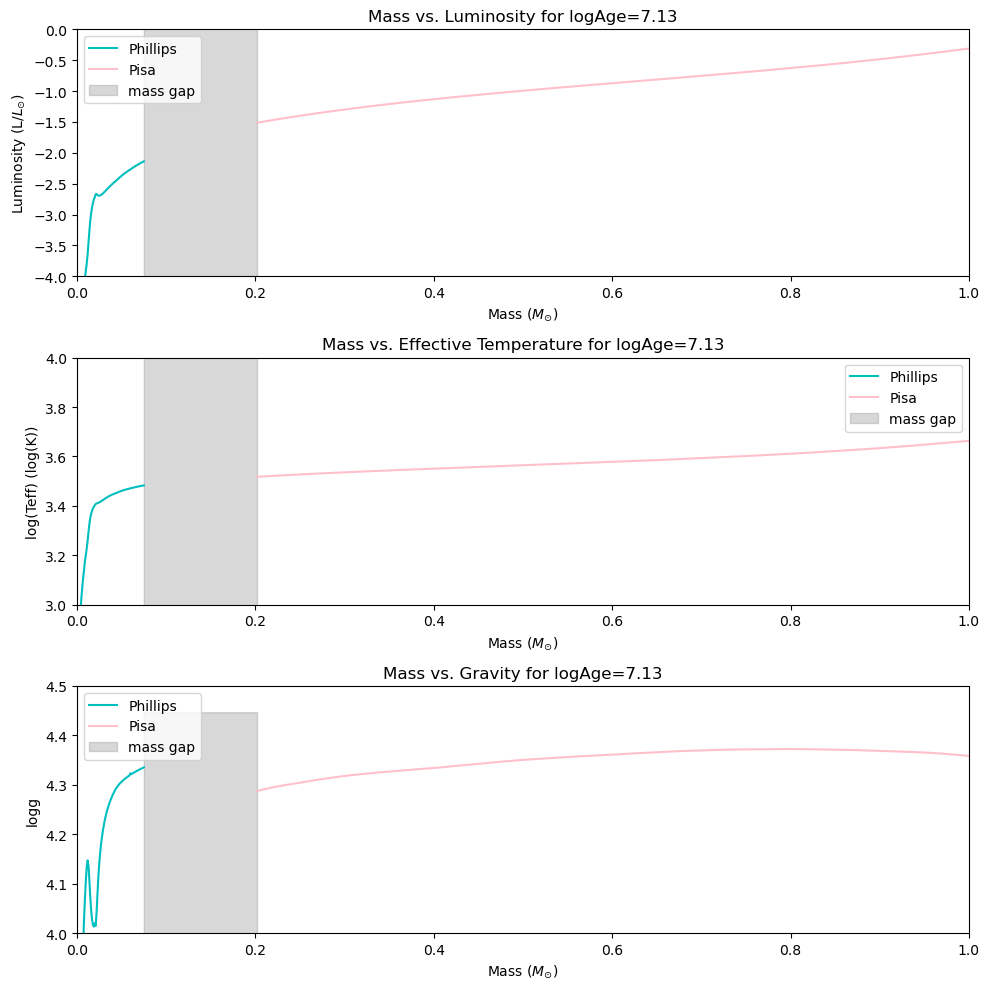

In [24]:
# creating graphs of mass vs. luminosity, Teff, and gravity
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# create array for mass gap
mass_gap = np.linspace(np.max(phil_mass), np.min(pisa_mass), 1000)

# mass vs. luminosity
axs[0].plot(phil_mass, phil_L, color='c', label='Phillips')
axs[0].plot(pisa_mass, pisa_L, color='pink', label='Pisa')
axs[0].set_title('Mass vs. Luminosity for logAge=7.13')
y_min0 = axs[0].get_ylim()[0]
y_max0 = axs[0].get_ylim()[1]
axs[0].fill_between(mass_gap, y_min0, y_max0, color='gray', label='mass gap', alpha=0.3)
axs[0].set_xlabel('Mass ($M_{\odot}$)')
axs[0].set_ylabel('Luminosity (L/$L_{\odot}$)')
axs[0].set_xlim(0,1)
axs[0].set_ylim(-4,0)
axs[0].legend()

# mass vs. Teff
axs[1].plot(phil_mass, phil_Teff, color='c', label='Phillips')
axs[1].plot(pisa_mass, pisa_Teff, color='pink', label='Pisa')
y_min1 = axs[1].get_ylim()[0]
y_max1 = axs[1].get_ylim()[1]
axs[1].fill_between(mass_gap, y_min1, y_max1, color='gray', label='mass gap', alpha=0.3)
axs[1].set_title('Mass vs. Effective Temperature for logAge=7.13')
axs[1].set_xlabel('Mass ($M_{\odot}$)')
axs[1].set_ylabel('log(Teff) (log(K))')
axs[1].set_xlim(0,1)
axs[1].set_ylim(3,4)
axs[1].legend()

# mass vs. logg (problem child)
axs[2].plot(phil_mass, phil_logg, color='c', label='Phillips')
axs[2].plot(pisa_mass, pisa_logg, color='pink', label='Pisa')
y_min2 = axs[2].get_ylim()[0]
y_max2 = axs[2].get_ylim()[1]
axs[2].fill_between(mass_gap, y_min2, y_max2, color='gray', label='mass gap', alpha=0.3)
axs[2].set_title('Mass vs. Gravity for logAge=7.13')
axs[2].set_xlabel('Mass ($M_{\odot}$)')
axs[2].set_ylabel('logg')
axs[2].set_xlim(0,1)
axs[2].set_ylim(4,4.5)
axs[2].legend()

fig.tight_layout()
plt.legend()
plt.show()

From these zoomed in graphs it becomes clear that though a mass gap is present, luminosty and effective temperature still seem to line up if a model connects them. In contrast, the graph for log gravity is very clearly disconnected, which is worth refining as new models continue to be generated. 